# Title : Analyzing Air Quality Index (AQI) Trends in a City

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [12]:
# 1 Import the "City_Air_Quality.csv" dataset.
df = pd.read_csv("City_Air_Quality_Extended.csv")
df

,date,time,PM2.5,PM10,CO,AQI
0,2023-01-01,08:00:00,52.483571,81.958453,0.493077,68.037513
1,2023-01-01,20:00:00,49.857307,70.833513,0.441528,110.957795
2,2023-01-02,08:00:00,54.335286,85.316747,0.495035,143.912860
3,2023-01-02,20:00:00,59.259382,64.824840,0.465702,77.871483
4,2023-01-03,08:00:00,51.019618,92.757905,0.481942,110.631344
...,...,...,...,...,...,...
725,2023-12-29,20:00:00,66.335298,83.708624,0.477235,123.639680
726,2023-12-30,08:00:00,67.618284,108.410832,0.326994,84.816334
727,2023-12-30,20:00:00,69.521733,104.241324,0.382507,103.374546
728,2023-12-31,08:00:00,65.329350,112.870943,0.372046,93.648394


In [3]:
# 2.Explore the dataset to understand its structure and content
df.columns

Index(['date', 'time', 'PM2.5', 'PM10', 'CO', 'AQI'], dtype='object')

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    730 non-null    object 
 1   time    730 non-null    object 
 2   PM2.5   730 non-null    float64
 3   PM10    730 non-null    float64
 4   CO      730 non-null    float64
 5   AQI     730 non-null    float64
dtypes: float64(4), object(2)
memory usage: 34.3+ KB


In [5]:
df.isnull().mean()*100

date     0.0
time     0.0
PM2.5    0.0
PM10     0.0
CO       0.0
AQI      0.0
dtype: float64

In [6]:
df.head()

,date,time,PM2.5,PM10,CO,AQI
0,2023-01-01,08:00:00,52.483571,81.958453,0.493077,68.037513
1,2023-01-01,20:00:00,49.857307,70.833513,0.441528,110.957795
2,2023-01-02,08:00:00,54.335286,85.316747,0.495035,143.912860
3,2023-01-02,20:00:00,59.259382,64.824840,0.465702,77.871483
4,2023-01-03,08:00:00,51.019618,92.757905,0.481942,110.631344


In [7]:
df.tail()

,date,time,PM2.5,PM10,CO,AQI
725,2023-12-29,20:00:00,66.335298,83.708624,0.477235,123.639680
726,2023-12-30,08:00:00,67.618284,108.410832,0.326994,84.816334
727,2023-12-30,20:00:00,69.521733,104.241324,0.382507,103.374546
728,2023-12-31,08:00:00,65.329350,112.870943,0.372046,93.648394
729,2023-12-31,20:00:00,64.367381,106.240449,0.420623,119.299848


In [8]:
df.describe()

,PM2.5,PM10,CO,AQI
count,730.000000,730.000000,730.000000,730.000000
mean,50.535522,84.574138,0.537460,101.941368
std,14.523314,23.834302,0.142204,37.396928
min,20.000000,30.000000,0.195327,50.000000
25%,38.035410,64.827707,0.423133,65.992751
50%,51.773356,86.056276,0.564756,103.858187
75%,63.213634,104.905700,0.654935,131.963502
max,80.626134,133.917000,0.837871,196.924786


In [9]:
df.describe(include='object')

,date,time
count,730,730
unique,365,2
top,2023-01-01,08:00:00
freq,2,365


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    730 non-null    datetime64[ns]
 1   time    730 non-null    datetime64[ns]
 2   PM2.5   730 non-null    float64       
 3   PM10    730 non-null    float64       
 4   CO      730 non-null    float64       
 5   AQI     730 non-null    float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 34.3 KB


In [11]:
# 3.Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.

# Combine date and time into a single datetime column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))
df.head()

,date,time,PM2.5,PM10,CO,AQI,datetime
0,2023-01-01,2025-10-06 08:00:00,52.483571,81.958453,0.493077,68.037513,2023-01-01 08:00:00-06:00
1,2023-01-01,2025-10-06 20:00:00,49.857307,70.833513,0.441528,110.957795,2023-01-01 20:00:00-06:00
2,2023-01-02,2025-10-06 08:00:00,54.335286,85.316747,0.495035,143.912860,2023-01-02 08:00:00-06:00
3,2023-01-02,2025-10-06 20:00:00,59.259382,64.824840,0.465702,77.871483,2023-01-02 20:00:00-06:00
4,2023-01-03,2025-10-06 08:00:00,51.019618,92.757905,0.481942,110.631344,2023-01-03 08:00:00-06:00


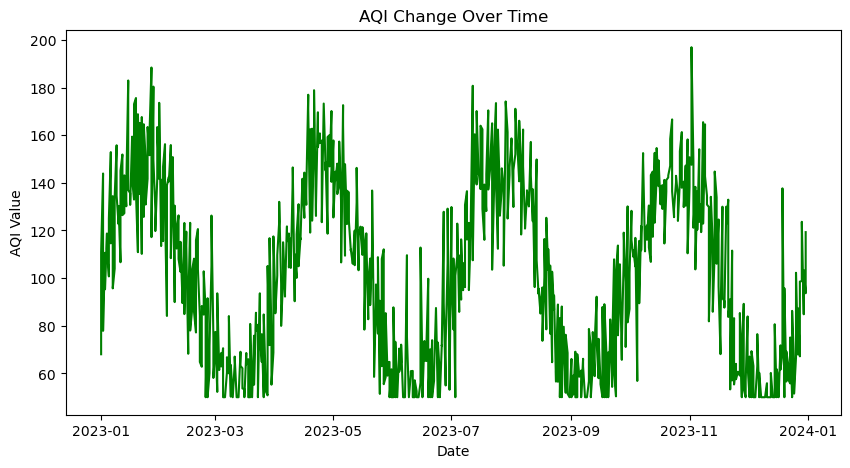

In [12]:
# Select relevant columns
relevant_vars = df[['datetime', 'PM2.5', 'PM10', 'CO', 'AQI']]

# --- Visualization 1: AQI over time ---

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['AQI'], color='green')
plt.title('AQI Change Over Time')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.show()

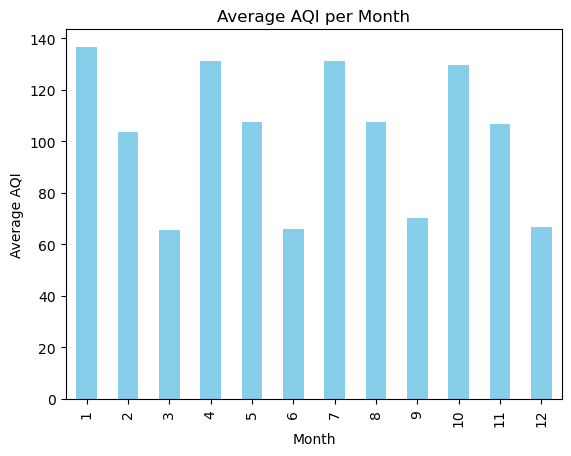

In [13]:
# --- Visualization 2: Relationship between pollutants and AQI ---

df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['AQI'].mean()

monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average AQI per Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


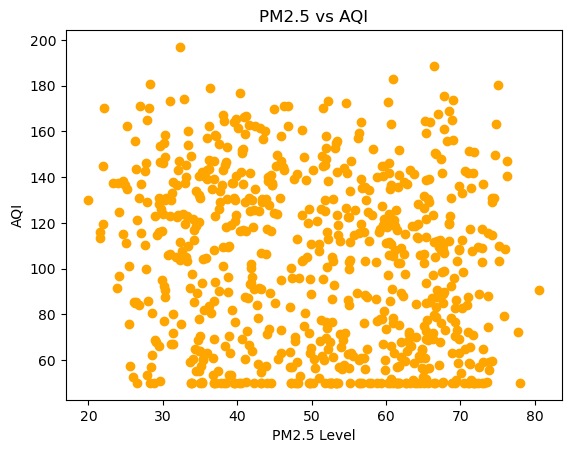

In [14]:
plt.scatter(df['PM2.5'], df['AQI'], color='orange')
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5 Level')
plt.ylabel('AQI')
plt.show()


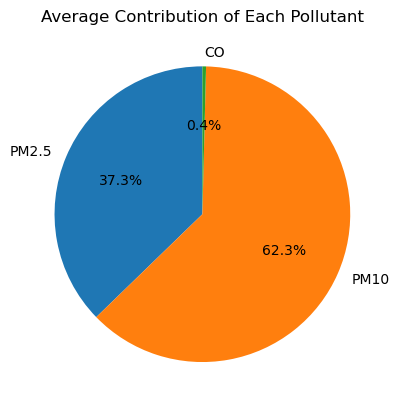

In [15]:
pollutant_avg = [df['PM2.5'].mean(), df['PM10'].mean(), df['CO'].mean()]
labels = ['PM2.5', 'PM10', 'CO']

plt.pie(pollutant_avg, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Average Contribution of Each Pollutant')
plt.show()


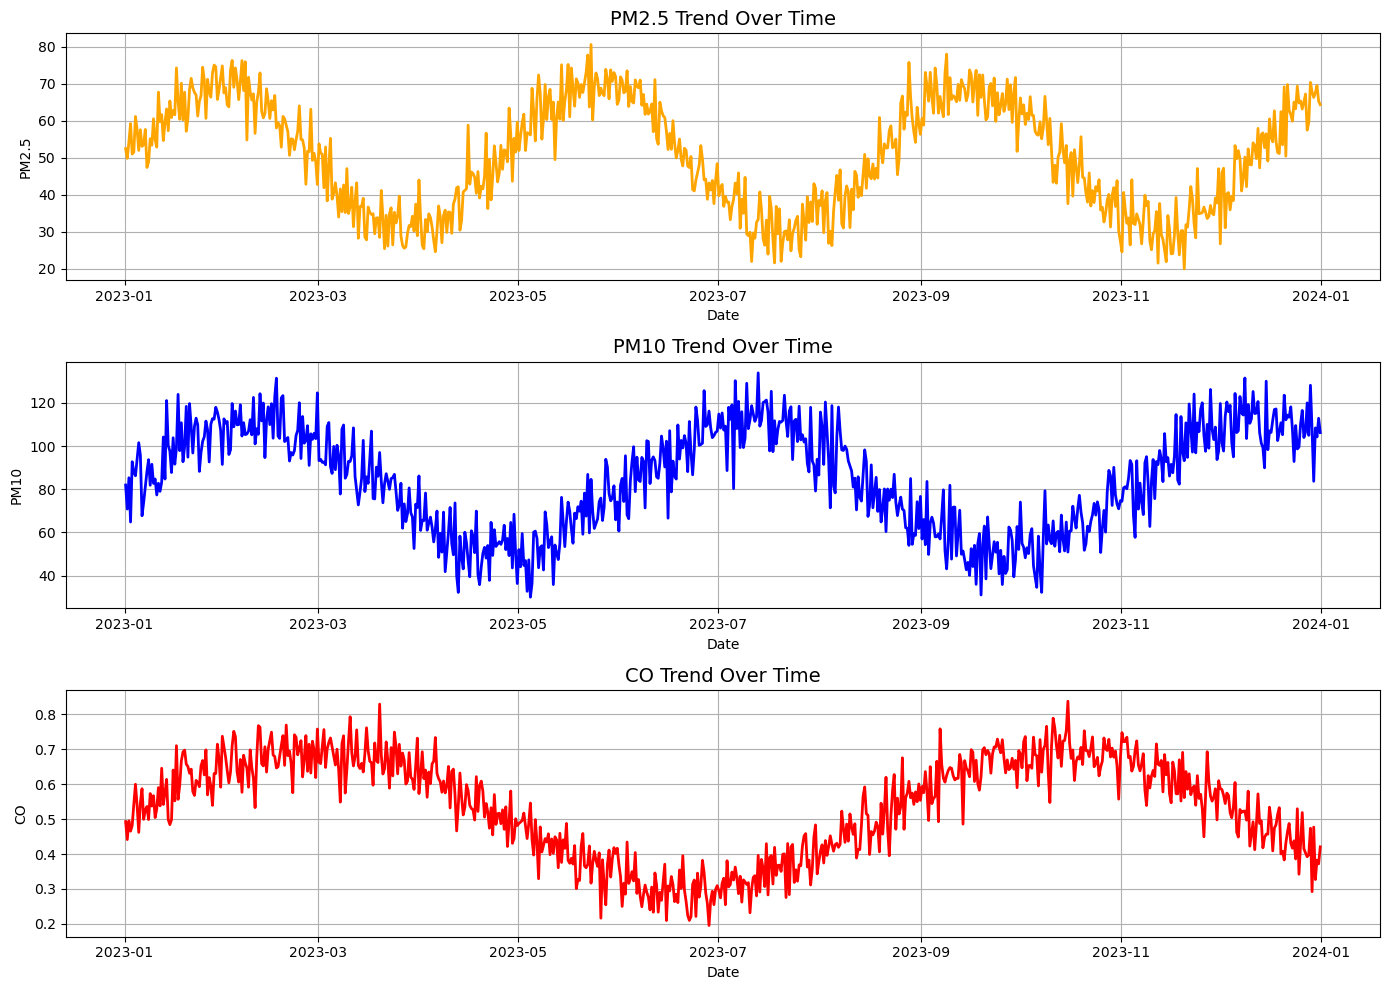

In [16]:
# 4. Create line plots or time series plots to visualize the overall AQI trend over time. List of pollutants
# 5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time.


pollutants = ['PM2.5', 'PM10', 'CO']
colors = ['orange', 'blue', 'red']

plt.figure(figsize=(14,10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 1, i)
    plt.plot(df['datetime'], df[pollutant], color=colors[i-1], linewidth=2)
    plt.title(f'{pollutant} Trend Over Time', fontsize=14)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel(pollutant, fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()


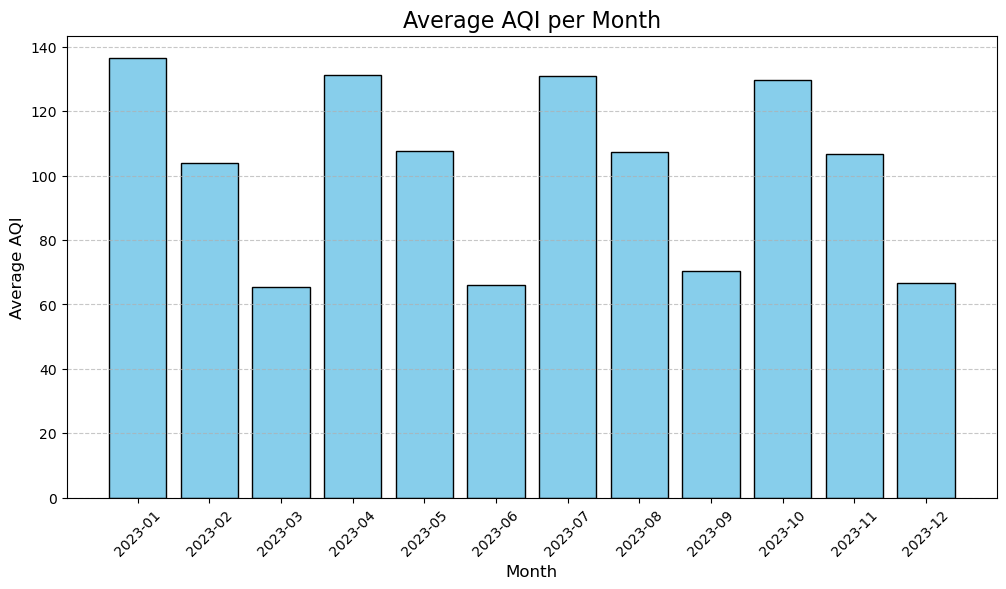

In [17]:
# 6. Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

# Aggregate AQI per month
df['month'] = df['date'].dt.to_period('M')  # Converts to Year-Month format
monthly_aqi = df.groupby('month')['AQI'].mean().reset_index()

# Convert month back to string for plotting
monthly_aqi['month'] = monthly_aqi['month'].astype(str)

# Plot
plt.figure(figsize=(12,6))
plt.bar(monthly_aqi['month'], monthly_aqi['AQI'], color='skyblue', edgecolor='black')
plt.title('Average AQI per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# 7.Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories.

# Safe bin edges using min and max values
pm25_min = df['PM2.5'].min()
pm25_max = df['PM2.5'].max()
pm25_bins = np.linspace(pm25_min, pm25_max, 4)  # 3 categories = 4 edges
pm25_labels = ['Low', 'Medium', 'High']

df['PM2.5_Category'] = pd.cut(df['PM2.5'], bins=pm25_bins, labels=pm25_labels, include_lowest=True)

df['PM2.5_Category'] = pd.qcut(df['PM2.5'], q=3, labels=['Low', 'Medium', 'High'])
df['PM10_Category'] = pd.qcut(df['PM10'], q=3, labels=['Low', 'Medium', 'High'])
df['CO_Category'] = pd.qcut(df['CO'], q=3, labels=['Low', 'Medium', 'High'])



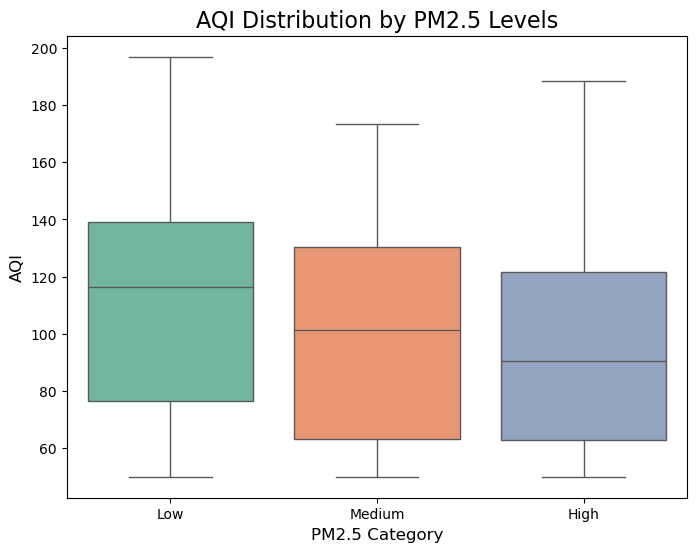

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PM2.5_Category', y='AQI', data=df, palette='Set2')
plt.title('AQI Distribution by PM2.5 Levels', fontsize=16)
plt.xlabel('PM2.5 Category', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.show()


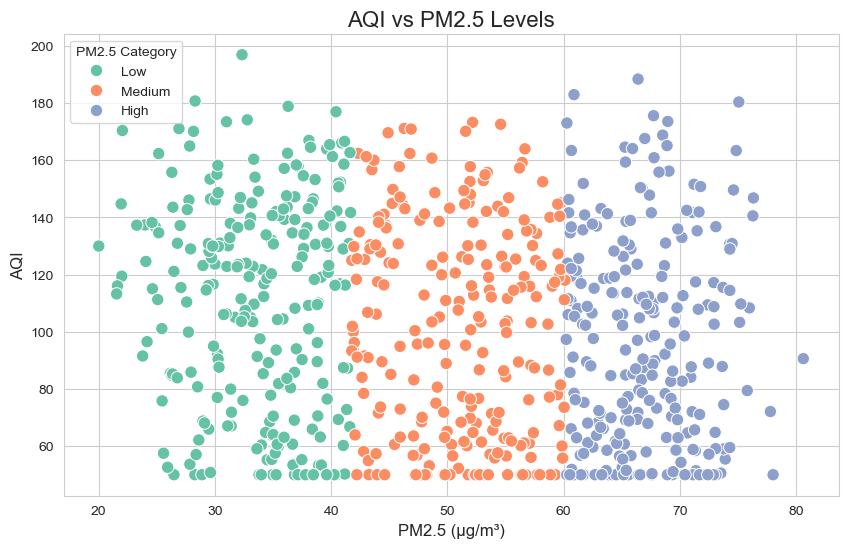

In [20]:
# 8.Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.


# Set style
sns.set_style("whitegrid")

# Scatter plot: AQI vs PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PM2.5', 
    y='AQI', 
    hue='PM2.5_Category', 
    data=df,            # <- Important!
    palette='Set2', 
    s=80
)
plt.title('AQI vs PM2.5 Levels', fontsize=16)
plt.xlabel('PM2.5 (µg/m³)', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.legend(title='PM2.5 Category')
plt.show()



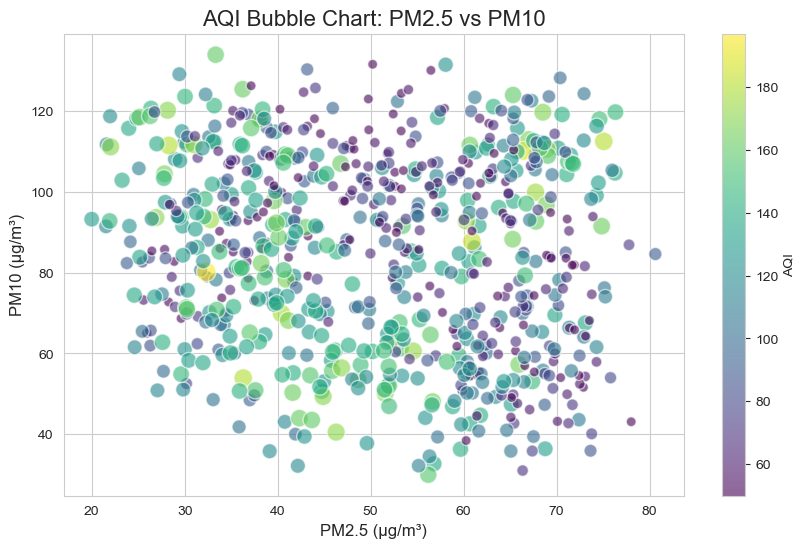

In [21]:
# 9.Customize the visualizations by adding labels, titles, legends, and appropriate color schemes.
plt.figure(figsize=(10,6))
plt.scatter(
    df['PM2.5'], 
    df['PM10'], 
    s=df['AQI'],  # Bubble size proportional to AQI
    c=df['AQI'],  # Bubble color proportional to AQI
    cmap='viridis', alpha=0.6, edgecolors='w'
)
plt.colorbar(label='AQI')
plt.title('AQI Bubble Chart: PM2.5 vs PM10', fontsize=16)
plt.xlabel('PM2.5 (µg/m³)', fontsize=12)
plt.ylabel('PM10 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()
